# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

HTTPError: HTTP Error 503: Service Unavailable

In [3]:
df=pd.read_csv('world-happiness-report-2019.csv')

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [48]:
df.head(3)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0


In [55]:
# удаляю столбце со страной
filt_df = df.loc[:, df.columns != 'Country (region)']
# вычисляю квартили
low = .05
high = .95
quant_df = filt_df.quantile([low, high])
# фильтрую по квартилям
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
# возвращаю страну
filt_df = pd.concat([df.loc[:,'Country (region)'], filt_df], axis=1)
filt_df.dropna(inplace=True)
print(filt_df.head())

   Country (region)  Ladder  SD of Ladder  Positive affect  Negative affect  \
9           Austria    10.0          10.0             64.0             24.0   
12           Israel    13.0          14.0            104.0             69.0   
16          Germany    17.0          17.0             65.0             30.0   
18    United States    19.0          49.0             35.0             70.0   
19   Czech Republic    20.0          20.0             74.0             22.0   

    Social support  Freedom  Corruption  Generosity  Log of GDP\nper capita  \
9             31.0     26.0        19.0        25.0                    16.0   
12            38.0     93.0        74.0        24.0                    31.0   
16            39.0     44.0        17.0        19.0                    17.0   
18            37.0     62.0        42.0        12.0                    10.0   
19            24.0     58.0       121.0       117.0                    32.0   

    Healthy life\nexpectancy  
9                  

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

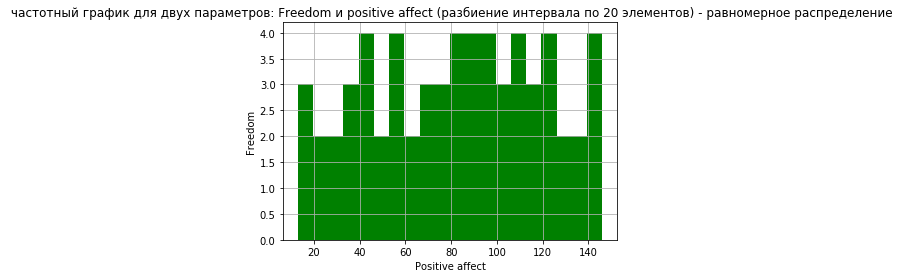

In [66]:
n, bins, patches = plt.hist(filt_df['Freedom'], 20, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.title(' частотный график для двух параметров: Freedom и positive affect (разбиение интервала по 20 элементов) - равномерное распределение')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [64]:
print('Медиана: ', statistics.median(filt_df['Freedom']))
# print('Значение моды: ', statistics.mode(Freedom)) - моды нет, no unique mode; found 156 equally common values
print('Мат ожидание: ', statistics.mean(filt_df['Freedom']))
print('Станд отклон: ',statistics.pstdev(filt_df['Freedom']))
print('Мин: ',min(Freedom))
print('Макс: ',max(Freedom))
print('Выбросы: ',filt_df['Freedom'].isnull().sum())
print('Размах: ', (max(Freedom) - min(Freedom)))

Медиана:  85.5
Мат ожидание:  82.14516129032258
Станд отклон:  37.46776970823683
Мин:  1.0
Макс:  155.0
Выбросы:  0
Размах:  154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.43090154307734496 , чем коэффициент ближе к 0, тем более независимы переменные, положительный знак коэф говорит о том, что корреляция сонаправлена


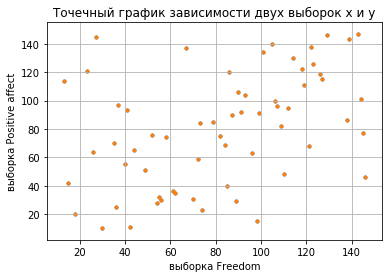

In [68]:
Freedom = filt_df['Freedom']
positive_affect  = filt_df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(Freedom, positive_affect, marker='.')

from scipy.stats import pearsonr
Freedom = filt_df['Freedom']
positive_affect  = filt_df['Positive affect']

corr, p_value = pearsonr(Freedom, positive_affect )
plt.scatter(Freedom, positive_affect, marker='.')
print('Коэффициент корреляции Пирсона:', corr, ', чем коэффициент ближе к 0, тем более независимы переменные, положительный знак коэф говорит о том, что корреляция сонаправлена')


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [74]:
#централизация
Freedom = filt_df['Freedom']
print(statistics.mean(Freedom))
#нормализация
Freedom_1 = Freedom  - statistics.mean(Freedom)
print(statistics.mean(Freedom_1))
#масштабирование
min(Freedom_1)
max(Freedom_1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_2= min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1, 1))
print(min(Freedom_2))
print(max(Freedom_2))

82.14516129032258
4.1257320140909046e-15
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

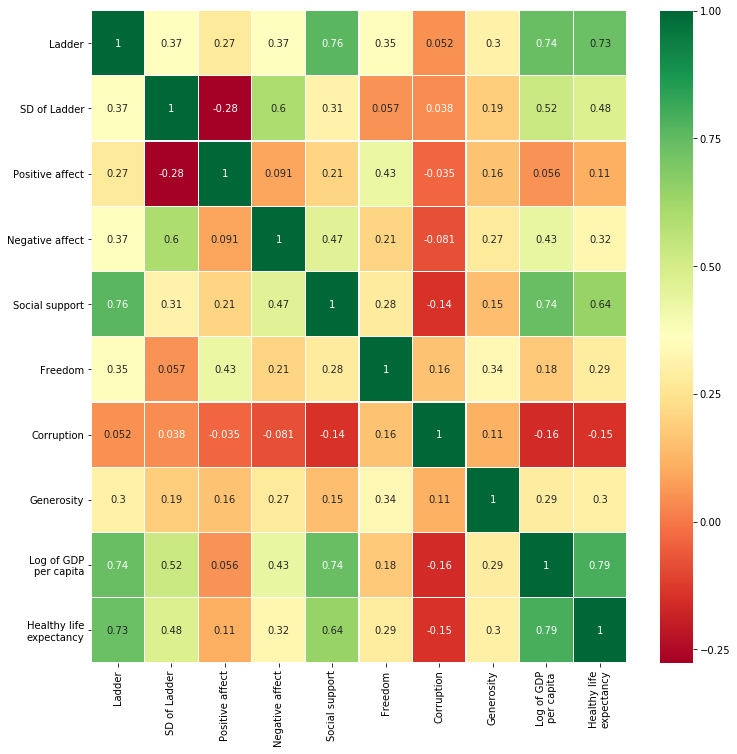

In [75]:
import seaborn as sns
sns.heatmap(filt_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [77]:
import io
import requests
#url="http://yustiks.ru/avocado.csv"
#df=pd.read_csv(url) - так не открылся, выдал urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

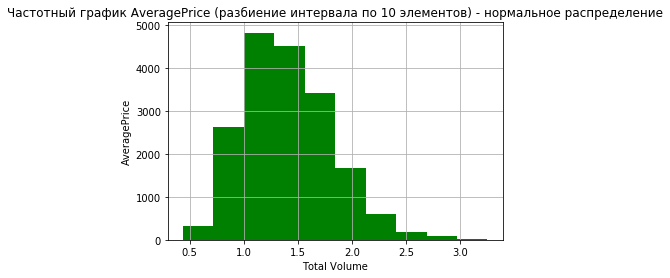

In [79]:
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')

plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов) - нормальное распределение')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Коэффициент корреляции Пирсона: -0.20831704848788477


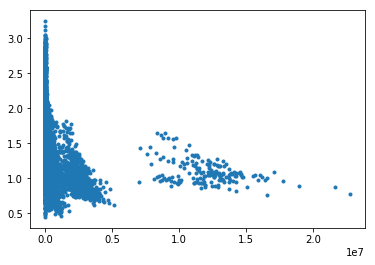

In [80]:
# не уверена, что правильно поняла часть про Total number of avocados with PLU 4046 sold 
from scipy.stats import pearsonr
Total_number = df['4046']
Average_Price  = df['AveragePrice']

corr, p_value = pearsonr(Total_number, Average_Price)
plt.scatter(Total_number, Average_Price, marker='.')
print('Коэффициент корреляции Пирсона:', corr,', отрицательная корреляция, зависимости нет')